In [1]:
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
%matplotlib inline

In [2]:
ds_prec = np.array([18, 15, 13, 10])
prec_r1 = 1.0/np.sqrt(np.sum(1.0/ds_prec**2))
print("Run-1 precision", round(prec_r1,2), "ppm")

Run-1 precision 6.53 ppm


### Based on 59.2M tracks yielding 6 ppm precision

In [3]:
n_tracks_r1 = 59.2e6
r1_calo_prec = 1.4
BNL_prec = 0.54 
r1_calo_tracks = 930e6

dR_calo = np.sqrt(r1_calo_tracks/n_tracks_r1) * r1_calo_prec
print("Scaling by calo prec of", r1_calo_prec,  "yields tracker prec of", round(dR_calo,2), "ppm" )

Scaling by calo prec of 1.4 yields tracker prec of 5.55 ppm


In [4]:
r1_tracker_goal = 1.2 

n_tracks_Done = ( prec_r1*np.sqrt(n_tracks_r1) /r1_tracker_goal )**2
print(round(n_tracks_Done/1e9,1), "x1e9 tracks required to reach", r1_tracker_goal, "ppm with trackers")
n_tracks_BNL = ( prec_r1*np.sqrt(n_tracks_r1) /BNL_prec )**2
print(round(n_tracks_BNL/1e9,1), "x1e9 tracks required to reach", BNL_prec, "ppm with trackers")

1.8 x1e9 tracks required to reach 1.2 ppm with trackers
8.7 x1e9 tracks required to reach 0.54 ppm with trackers


In [5]:
raw_e_BNL_r1 = 2 # x2 BNL 
n_tracks_per_BNL = n_tracks_r1/raw_e_BNL_r1
print("Collecting", n_tracks_per_BNL, "tracks per BNL worth of e+")

### For Run-1 to Run-5 based on raw e+ vs. BNL

In [6]:
runs = (1, 2, 3, 4, 5)
runs_BNL = (2,  4.2, 7.6, 15.0, 21.0)
runs_BNL_corr = (1, 1.6, 1.8, 1.8, 1.8)

### Assume scaling is the same as for Run-1

In [7]:
tracks = np.array(runs_BNL) * n_tracks_per_BNL
print("Uncorrected", tracks)
tracks = np.multiply(runs_BNL_corr, tracks)
print("Corrected", tracks)

Uncorrected [5.9200e+07 1.2432e+08 2.2496e+08 4.4400e+08 6.2160e+08]
Corrected [5.92000e+07 1.98912e+08 4.04928e+08 7.99200e+08 1.11888e+09]


### Convert from N projected to precision
$$ \frac{\delta R_1}{\sqrt{N_2}} = \frac{\delta R_2}{\sqrt{N_1}} $$

In [8]:
prec = np.sqrt(n_tracks_r1) * prec_r1/np.sqrt(tracks)
prec_4 = np.sqrt(n_tracks_r1) * prec_r1/np.sqrt(tracks*4)
prec_6 = np.sqrt(n_tracks_r1) * prec_r1/np.sqrt(tracks*6)

### Now for the secondary axis, estimate the end points (y-axis limits); How many tracks we need for 10 ppm and 0.1 ppm

In [9]:
prec_min = 0.1
prec_max= 0.54
n_min = (n_tracks_r1 * prec_r1**2 / prec_min**2)
n_max = (n_tracks_r1 * prec_r1**2 / prec_max**2)
print("Limits for the secondary axis x10^10", n_min, n_max*1e-9)

Limits for the secondary axis x10^10 252473300517.16614 8.658206464923394


No plot style specified, returning a nicely formatted axis only: use it e.g. 'ax.plot()'


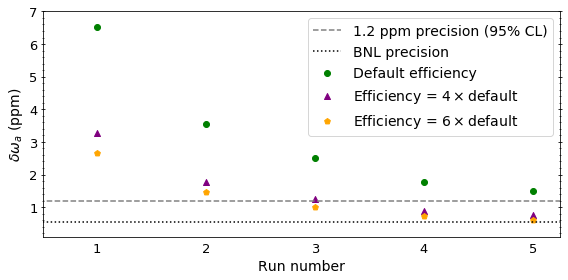

In [14]:
fig, ax = cu.plot(None, None, figsize=(8,4));
ax.scatter(runs, prec, c="g", marker="o", label="Default efficiency")
ax.scatter(runs, prec_4, c="purple", marker="^", label=r"Efficiency = $4\times \rm{default}$")
ax.scatter(runs, prec_6, c="orange", marker="p", label=r"Efficiency = $6\times \rm{default}$")

# only int ticks on x-axis
plt.xticks(runs)
ax.set_xlim(0.5, 5.25)
ax.set_xlabel("Run number")
ax.tick_params(axis='x', which='both', bottom=False, top=False, direction='inout')

#now set exact limits and allow secondary axis
ax.set_ylim(prec_min, 7)
ax.set_ylabel(r"$\delta \omega_a$ (ppm)")

#Add secondary y-axis
# ax2 = ax.twinx()
# ax2.set_yscale('log')
# ax2.set_ylim(1.4e10, 47952000.0)
# ax2.set_ylabel(r'Number of tracks', fontsize=13)


# Plot the BNL and 1ppm lines
ax.plot( [-0.1, 6], [1.2, 1.2], c="gray", ls="--", label="1.2 ppm precision (95% CL)")
ax.plot( [-0.1, 6], [0.54, 0.54], label="BNL precision", c="black", ls=":")

ax.legend(fontsize=14)
fig.tight_layout()
plt.savefig("../fig/money.png", dpi=200)

# 

No plot style specified, returning a nicely formatted axis only: use it e.g. 'ax.plot()'


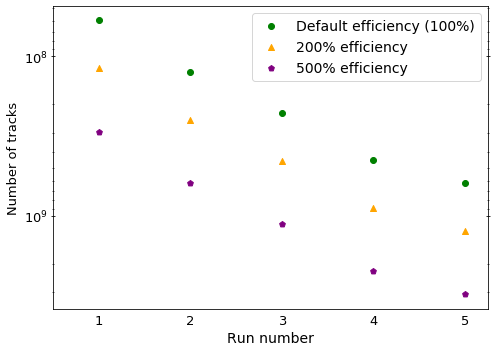

In [11]:
fig, ax = cu.plot(None, None);
ax.scatter(runs, tracks, c="g", marker="o", label="Default efficiency (100%)")
ax.scatter(runs, tracks*2, c="orange", marker="^", label="200% efficiency")
ax.scatter(runs, tracks*5, c="purple", marker="p", label="500% efficiency")

# only int ticks on x-axis
plt.xticks(runs)
ax.set_xlim(0.5, 5.25)
ax.set_xlabel("Run number")
ax.tick_params(axis='x', which='both', bottom=False, top=False, direction='inout')

#now set exact limits and allow secondary axis
ax.set_yscale('log')
ax.set_ylim(ax.get_ylim()[1], ax.get_ylim()[0])
ax.set_ylabel(r'Number of tracks', fontsize=13)


# # Plot the BNL and 1ppm lines
# ax.plot( [-0.1, 6], [1, 1], c="gray", ls="--", label="1 ppm precision")
# ax.plot( [-0.1, 6], [0.54, 0.54], label="BNL precision", c="black", ls=":")

ax.legend(fontsize=14)
fig.tight_layout()
plt.savefig("../fig/money_tracks.png", dpi=200)